<a href="https://colab.research.google.com/github/NarmadhaRameshbabu/skillcraft_datascience/blob/main/SCT_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt



In [26]:
# Load the dataset from local file
file_path = (r'/content/bank-additional.csv')
data = pd.read_csv(file_path, sep=';')

In [27]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx 

In [28]:
# Preprocess the data
# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, drop_first=True)
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,False,False,False,False,False,False,False,True,False,False
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,False,False,False,False,False,False,False,True,False,False
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,False,False,False,False,False,False,True,True,False,False
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,False,False,False,False,False,False,False,True,False,False
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,True,False,False,True,False,False,False,True,False,False


In [29]:
# Split the dataset into features and target variable
X = data.drop('y_yes', axis=1)

# Assuming 'y' is the target column and we want to predict 'yes'
y = data['y_yes']
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,False,False,False,False,False,False,False,True,False,False
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,False,False,False,False,False,False,False,True,False,False
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,False,False,False,False,False,False,True,True,False,False
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,False,False,False,False,False,False,False,True,False,False
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,True,False,False,True,False,False,False,True,False,False


In [30]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
# Make predictions on the test set
y_pred = clf.predict(X_test)


# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8822815533980582
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.93      0.93       732
        True       0.47      0.47      0.47        92

    accuracy                           0.88       824
   macro avg       0.70      0.70      0.70       824
weighted avg       0.88      0.88      0.88       824



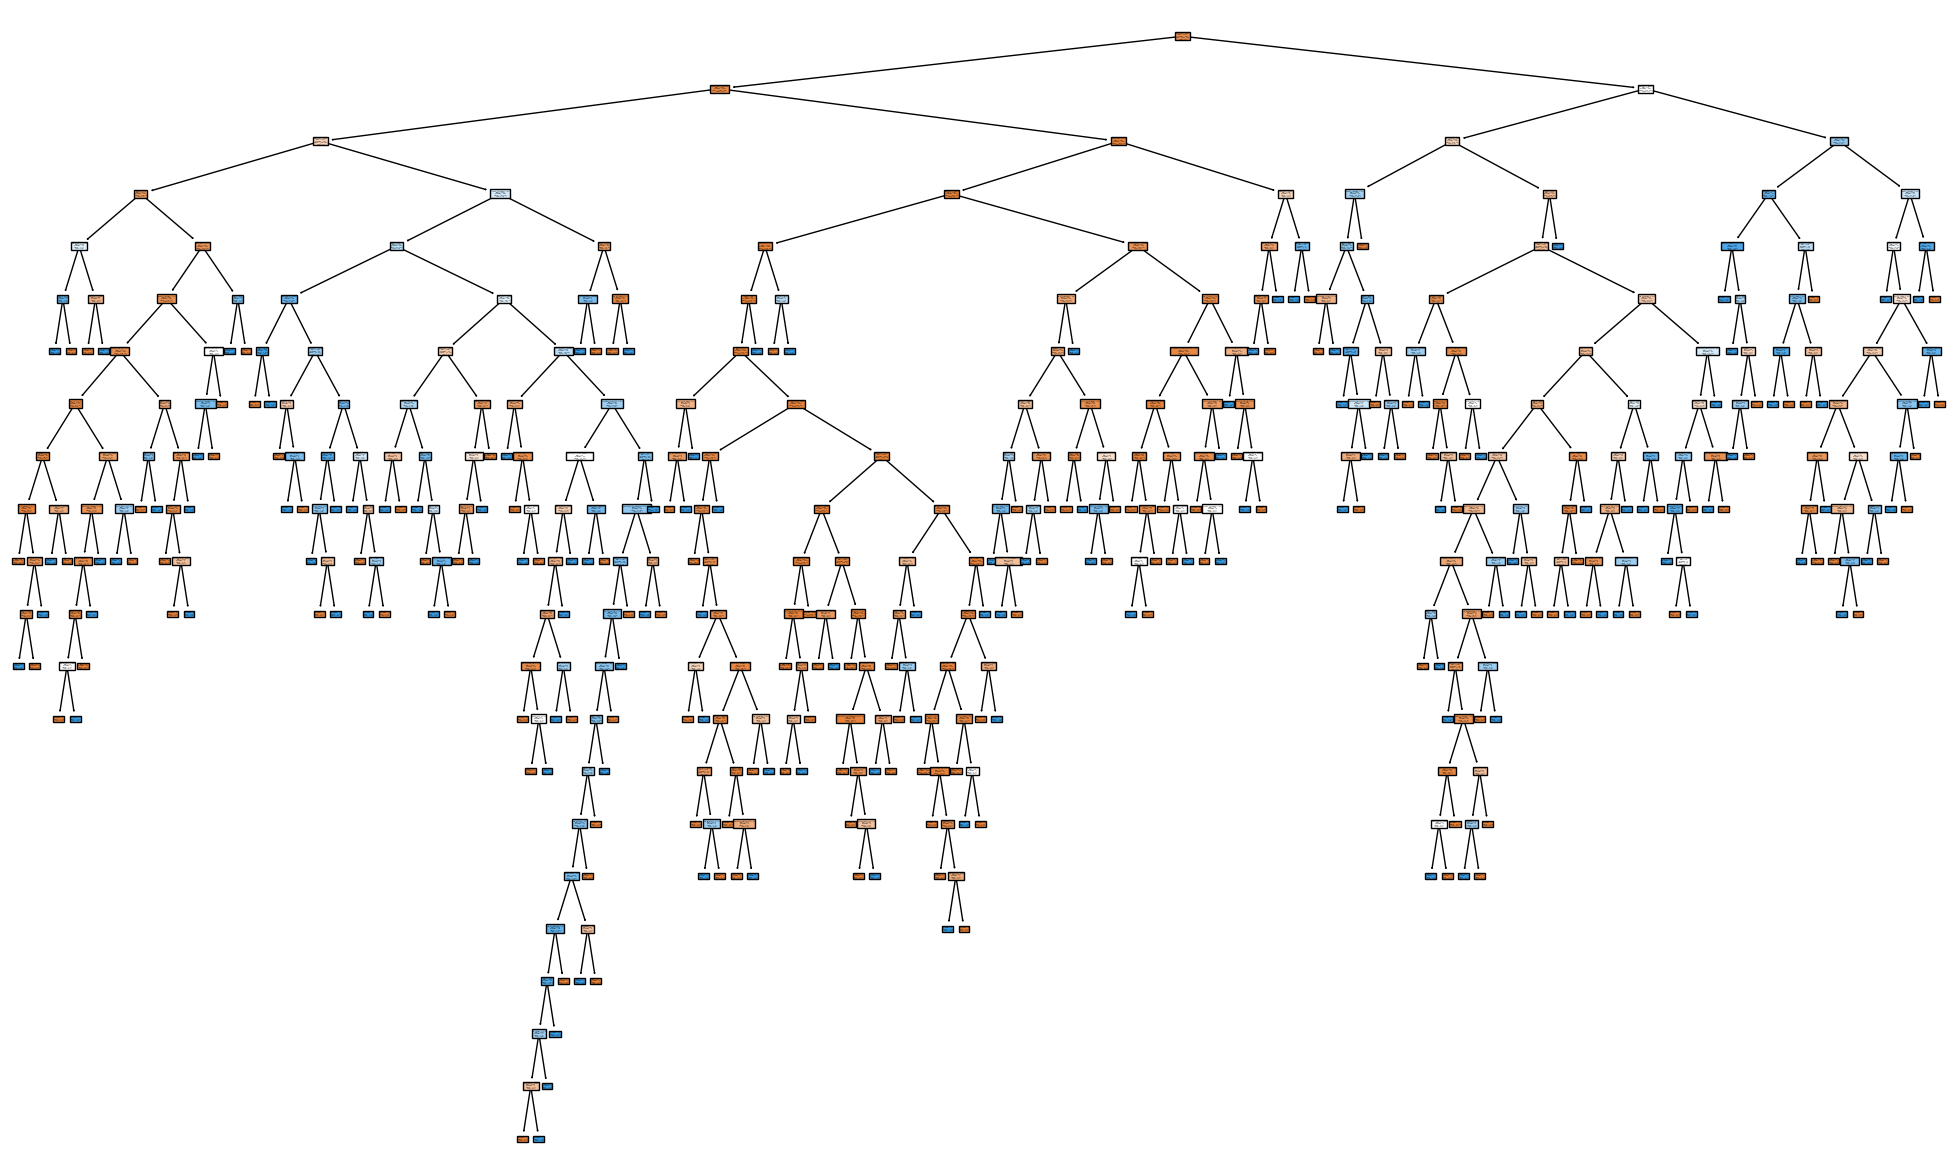

In [34]:
# Plot the decision tree
plt.figure(figsize=(25,15))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()